# Regression Metrics
This notebook is used to present the most important and used metrics to evaluate the performance of regression models.

## Learn the model
Let's start with the creation of a toy dataset.

In [1]:
from sklearn.datasets import make_regression
import numpy as np
X, y = make_regression(n_samples=100, n_features=1, noise=1.5)

Let's visualize our dataset.

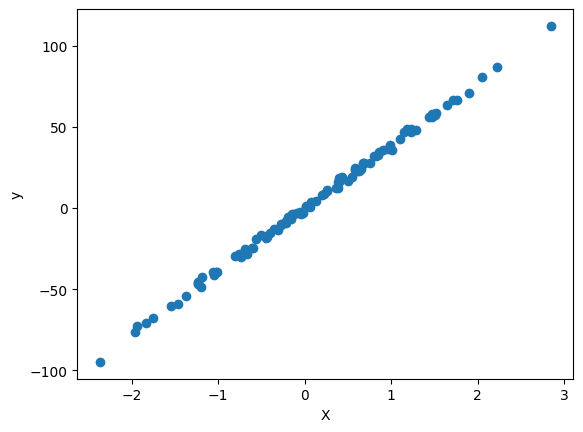

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can now construct in a proper way the training and test dataset and learn the model. The aim of this notebook is just present the metrics used to evaluate a regression task. Hence, we will just use a standard holdout procedure.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
lm = LinearRegression(fit_intercept=True, n_jobs=-1)
lm.fit(X_train, y_train)

y_test_pred = lm.predict(X_test)

## Numerical evaluation of the model

### Model evaluation with "absolute" metrics

#### **Mean Squared Error** (MSE) 
**MSE** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(p_i - a_i)^2$$

In [4]:
from sklearn.metrics import mean_squared_error
print(f'MSE on the test set: {mean_squared_error(y_test, y_test_pred)}')

MSE on the test set: 1.2674529381640154


#### **Root Mean Squared Error** (RMSE) 
**RMSE** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(p_i - a_i)^2}$$

In [5]:
from sklearn.metrics import root_mean_squared_error
print(f'RMSE on the test set: {root_mean_squared_error(y_test, y_test_pred)}')

RMSE on the test set: 1.1258121238306218


#### **Mean Absolute Error** (MAE) 
**MAE** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|p_i-a_i|$$

In [6]:
from sklearn.metrics import mean_absolute_error
print(f'MAE on the test set: {mean_absolute_error(y_test, y_test_pred)}')

MAE on the test set: 0.911372809482248


### Model evaluation with relative metrics: Improvement on the mean ...
The error is made relative to what it would have been if a simple dummy model had been used.


*How much does the scheme improve on simply predicting the averaged value from the training data?*

The main is to fit a dummy model on the training data. This dummy model just returns as prediction the mean value of the training values. We compare the performance of our model with respect to the dummy model.

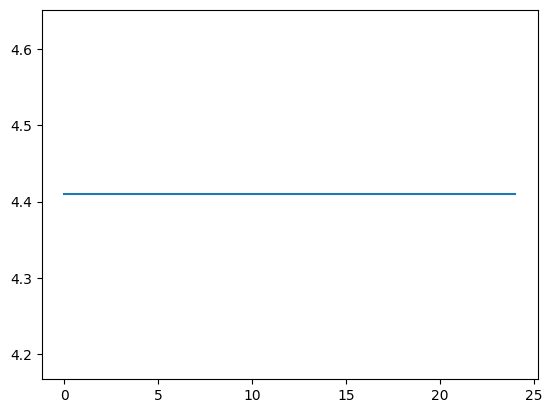

In [7]:
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)
y_test_pred_dummy = dummy_model.predict(X_test)
plt.plot(y_test_pred_dummy)
plt.show()

#### **Relative Squared Error** (RSE):

$$\sum_{i=1}^n \frac{(p_i-a_i)^2}{(a_i - \bar{a})^2}$$

where $\bar{a}$ is the mean value over the training data.

In [8]:
rse = np.sum(np.square(y_test_pred - y_test))/np.sum(np.square(y_test - y_test_pred_dummy))
print(f'RSE on the test set: {rse}')

RSE on the test set: 0.0006594048363233655


#### **Root Relative Squared Error** (RRSE):

$$\sqrt{\sum_{i=1}^n \frac{(p_i-a_i)^2}{(a_i - \bar{a})^2}}$$

where $\bar{a}$ is the mean value over the training data.

In [9]:
rrse = np.sqrt(np.sum(np.square(y_test_pred - y_test))/
               np.sum(np.square(y_test - y_test_pred_dummy)))
print(f'RRSE on the test set: {rrse}')

RRSE on the test set: 0.025678879187444405


#### **Relative Absolute Error** (RAE):

$$\sum_{i=1}^n \frac{|p_i-a_i|}{|a_i - \bar{a}|}$$

where $\bar{a}$ is the mean value over the training data.

In [10]:
rae = np.sum(np.abs(y_test_pred - y_test))/np.sum(np.abs(y_test - y_test_pred_dummy))
print(f'RAE on the test set: {rae}')

RAE on the test set: 0.025057193960378536


### Statistical metrics

#### Correlation coefficient (*r*)
$$
\frac{S_{PA}}{\sqrt{S_pS_A}}
$$

where 

$$
S_{PA} = \frac{\sum_{i=1}^n (p_i - \bar{p})(a_i - \bar{a})}{n -1}, 
S_{P} = \frac{\sum_{i=1}^n (p_i - \bar{p})^2}{n -1}, 
S_{A} = \frac{\sum_{i=1}^n (a_i - \bar{a})^2}{n -1}
$$

The values of R are between -1 and 1, inclusive:
* 1 perfectly correlated result
* 0 no correlation
* -1 perfectly correlated negatively

Good performance leads to large values towards 1!

In [11]:
print(f'R on the test set: {np.corrcoef(y_test, y_test_pred)[0, 1]}')

R on the test set: 0.999677550168614


#### **Coefficient of determination** (R$^2$) 
The coefficient of determination measures how well a statistical model predicts an outcome: 

$$R^2 = 1- \frac{\sum^{n}_{i=1}({a_{i} - p_{i})^2}}{\sum^{n}_{i=1}{(a_{i}- \bar{a})^2}}$$

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [12]:
from sklearn.metrics import r2_score
print(f'R2 on the test set: {r2_score(y_test, y_test_pred)}')

R2 on the test set: 0.9993385812648469


## Graphical evaluation of the model

Text(0.5, 1.0, 'Residual vs. Predicted values')

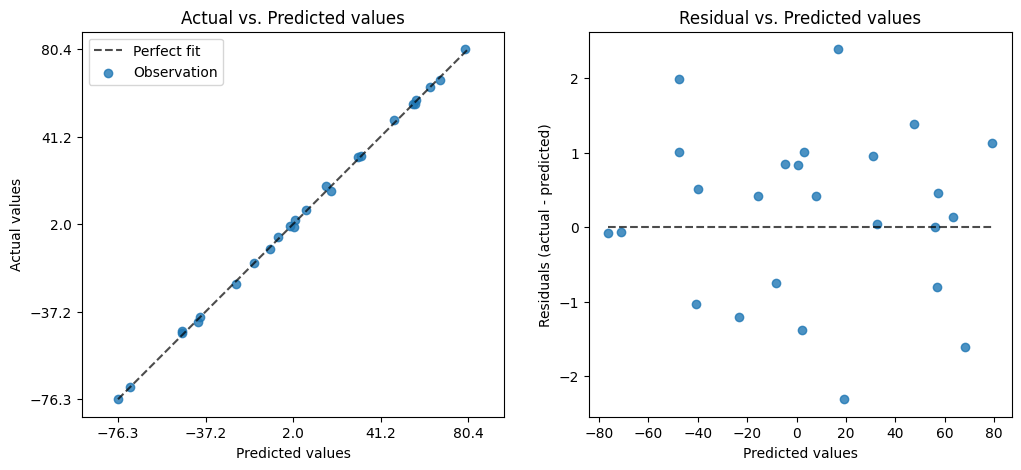

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    lm, X_test, y_test, kind="actual_vs_predicted", ax=axs[0]
)
axs[0].set_title('Actual vs. Predicted values')
axs[0].legend(['Perfect fit', 'Observation'])

_ = PredictionErrorDisplay.from_estimator(
    lm, X_test, y_test, kind="residual_vs_predicted", ax=axs[1]
)
axs[1].set_title('Residual vs. Predicted values')